In [ ]:
import pandas as pd
import random

In [ ]:
df = pd.read_csv('E0.csv')

In [ ]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.90,7.50,1.53,4.00,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.80,6.00,1.57,4.00,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.60,4.50,1.90,3.40,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.50,4.00,1.87,3.60,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.40,3.00,2.45,3.30,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.30,2.80,2.50,3.40,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.00,1.61,6.25,3.90,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.90,1.57,6.50,4.00,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.50,2.04,3.80,3.50,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.20,2.05,3.90,3.40,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,7,5,2,3,11,4,1,0,2,0,0,1.30,6.00,11.00,1.30,5.75,9.50,1.31,5.40,9.30,1.31,5.77,10.54,1.29,5.50,11.00,1.30,5.75,11.50,35,1.33,1.30,6.00,5.62,11.50,10.17,33,1.65,1.61,2.43,2.31,22,-1.50,1.98,1.91,2.01,1.95,1.32,5.89,9.48
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,13,10,4,9,6,11,2,3,3,0,0,1.28,6.50,11.00,1.25,6.25,11.00,1.28,6.10,9.20,1.28,6.33,10.21,1.25,6.50,10.00,1.29,6.25,11.00,34,1.31,1.28,6.75,6.18,11.00,10.10,32,1.45,1.39,3.25,2.95,21,-2.00,2.52,2.32,1.72,1.64,1.30,6.06,9.71
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,10,3,3,8,6,4,3,0,1,0,0,1.44,4.75,8.50,1.42,4.75,7.25,1.42,4.80,7.10,1.44,4.83,7.62,1.40,4.75,8.00,1.40,4.80,8.50,34,1.45,1.42,5.15,4.81,8.75,7.64,32,1.67,1.62,2.40,2.29,22,-1.50,2.27,2.16,1.80,1.73,1.37,5.36,8.49
378,E0,12/05/2019,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,17,3,9,10,13,7,4,0,2,0,0,2.20,3.50,3.50,2.10,3.50,3.50,2.05,3.45,3.60,2.10,3.64,3.64,2.10,3.50,3.50,2.10,3.50,3.70,35,2.20,2.09,3.70,3.51,3.80,3.58,34,1.81,1.76,2.18,2.07,19,-0.50,2.13,2.08,1.85,1.80,1.91,3.81,4.15


In [ ]:
df = df.drop(['Div', 'Date', 'HTR', 'HTHG', 'HTAG', 'Referee'], axis=1)

In [ ]:
df = df.iloc[:, :-39]

In [ ]:
df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,H,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,H,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,A,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,A,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,A,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolves,2,0,H,13,7,5,2,3,11,4,1,0,2,0,0
376,Man United,Cardiff,0,2,A,26,13,10,4,9,6,11,2,3,3,0,0
377,Southampton,Huddersfield,1,1,D,10,10,3,3,8,6,4,3,0,1,0,0
378,Tottenham,Everton,2,2,D,11,17,3,9,10,13,7,4,0,2,0,0


In [ ]:
#Selecionando as rodadas de treinamento e teste
training = df.iloc[:-10]
test = df.iloc[-10:] 

In [ ]:
# Embaralhar os dados de treinamento
# Embaralhar os dados de teste
training = training.sample(frac=1)
test = test.sample(frac=1)

In [ ]:
# Separar as colunas dos nomes dos times
# Salvar em uma variável separada
nomes = df[['HomeTeam', 'AwayTeam']]
nomes

,HomeTeam,AwayTeam
0,Man United,Leicester
1,Bournemouth,Cardiff
2,Fulham,Crystal Palace
3,Huddersfield,Chelsea
4,Newcastle,Tottenham
...,...,...
375,Liverpool,Wolves
376,Man United,Cardiff
377,Southampton,Huddersfield
378,Tottenham,Everton


In [ ]:
dfv1 = df.iloc[:, 2:]

In [ ]:
dfv1

,FTHG,FTAG,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2,1,H,8,13,6,4,11,8,2,5,2,1,0,0
1,2,0,H,12,10,4,1,11,9,7,4,1,1,0,0
2,0,2,A,15,10,6,9,9,11,5,5,1,2,0,0
3,0,3,A,6,13,1,4,9,8,2,5,2,1,0,0
4,1,2,A,15,15,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,0,H,13,7,5,2,3,11,4,1,0,2,0,0
376,0,2,A,26,13,10,4,9,6,11,2,3,3,0,0
377,1,1,D,10,10,3,3,8,6,4,3,0,1,0,0
378,2,2,D,11,17,3,9,10,13,7,4,0,2,0,0


In [ ]:
# Converter a coluna FTR em 1 (vitória do Home), 0 (draw), -1 (vitória do Away)
dfv2 = dfv1.replace({"H":1,"D":0,"A":-1})
# Remover (drop) nas colunas FTHG, FTAG
dfv3 = dfv2.iloc[:, 2:]
# A coluna do FTR (já convertida em 1,0,-1) você vai separar em uma DF novo (saída da rede neural)
NN = dfv3[['FTR']]
# Separar o DF em input e output. Input são as estatísticas. Output é a coluna FTR convertida em 1,0,-1.
input = dfv3.iloc[:, 1:]
output = NN

#Normalização de dados
for e in range(len(input.columns)): 
    max = input.iloc[:, e].max() #checar o valor maximo de cada coluna
    if max < 10:
        input.iloc[:, e] /= 10
    elif max < 100:
        input.iloc[:, e] /= 100
    else:
        print("Error in normalization! Please check!")
input

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0.08,0.13,0.06,0.04,0.11,0.08,0.02,0.05,0.2,0.1,0.0,0.0
1,0.12,0.10,0.04,0.01,0.11,0.09,0.07,0.04,0.1,0.1,0.0,0.0
2,0.15,0.10,0.06,0.09,0.09,0.11,0.05,0.05,0.1,0.2,0.0,0.0
3,0.06,0.13,0.01,0.04,0.09,0.08,0.02,0.05,0.2,0.1,0.0,0.0
4,0.15,0.15,0.02,0.05,0.11,0.12,0.03,0.05,0.2,0.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.13,0.07,0.05,0.02,0.03,0.11,0.04,0.01,0.0,0.2,0.0,0.0
376,0.26,0.13,0.10,0.04,0.09,0.06,0.11,0.02,0.3,0.3,0.0,0.0
377,0.10,0.10,0.03,0.03,0.08,0.06,0.04,0.03,0.0,0.1,0.0,0.0
378,0.11,0.17,0.03,0.09,0.10,0.13,0.07,0.04,0.0,0.2,0.0,0.0


In [ ]:
# Imprimir os conjuntos (são 4 conjuntos)
# Input de treinamento (são 12 colunas normalizadas entre 0 e 1) (são 370 linhas - 37 rodadas com 10 jogos cada) (370linhasx12colunas)
training_input = input[:-10]
# Output de treinamento (é uma coluna só com valores 1, 0 ou -1) (são 370 linhas - 37 rodadas com 10 jogos cada) (370linhasx01coluna)
training_output= output[:-10]
# Input de teste (são 12 colunas normalizadas entre 0 e 1) (são 10 linhas - 1 rodada) (10linhasx12colunas)
test_input = input[-10:]
# Output de teste (é uma coluna só com valores 1, 0 ou -1) (são 10 linhas - 1 rodada) (10linhasx01coluna)
test_output = output[-10:]

In [ ]:
#Nomes dos times
nomes_training = nomes[:-10]
nomes_test = nomes[-10:]
print(nomes_training)
print(nomes_test)

         HomeTeam        AwayTeam
0      Man United       Leicester
1     Bournemouth         Cardiff
2          Fulham  Crystal Palace
3    Huddersfield         Chelsea
4       Newcastle       Tottenham
..            ...             ...
365        Wolves          Fulham
366       Arsenal        Brighton
367       Chelsea         Watford
368  Huddersfield      Man United
369      Man City       Leicester

[370 rows x 2 columns]
           HomeTeam      AwayTeam
370        Brighton      Man City
371         Burnley       Arsenal
372  Crystal Palace   Bournemouth
373          Fulham     Newcastle
374       Leicester       Chelsea
375       Liverpool        Wolves
376      Man United       Cardiff
377     Southampton  Huddersfield
378       Tottenham       Everton
379         Watford      West Ham


In [ ]:
#Embaralhar os dados de treino
rs = random.randint(1,99)
training_input = training_input.sample(frac=1, random_state=rs)
training_output = training_output.sample(frac=1, random_state=rs)
nomes_training = nomes_training.sample(frac=1, random_state=rs)

In [ ]:
#Parte 2
import torch
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.Tanh = torch.nn.Tanh() 
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.Tanh(output)
        return output

In [ ]:
#convert to tensors
training_input = torch.FloatTensor(training_input.values)
training_output = torch.FloatTensor(training_output.values)
test_input = torch.FloatTensor(test_input.values)
test_output = torch.FloatTensor(test_output.values)

In [ ]:
input_size = training_input.size()[1] 
hidden_size = 500 
model = Net(input_size, hidden_size) 
criterion = torch.nn.MSELoss()  
optimizer = torch.optim.SGD(model.parameters(), lr = 0.75, momentum=0.35)

In [ ]:
model.eval()
y_pred = model(test_input)
before_train = criterion(y_pred.squeeze(), test_output.squeeze())
print('Test loss before training' , before_train.item())

Test loss before training 0.6620714068412781


Rodar o algoritimo abaixo de 6 a 7 vezes para melhorar a precisão




In [ ]:
model.train()
epochs = 500
errors = []
for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(training_input)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), training_output.squeeze())
    errors.append(loss.item())
    if epoch % 2000 == 0:
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.8444572687149048


In [ ]:
model.eval()
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output.squeeze())
print('Test loss after Training' , after_train.item())

Test loss after Training 0.7528525590896606


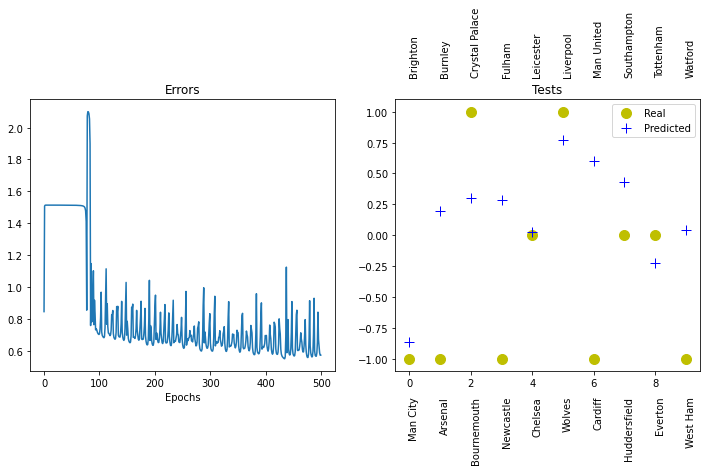

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    xx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    for x, home, away in zip(xx, nomes_test['HomeTeam'], nomes_test['AwayTeam']):
      plt.text(x, 1.3, home, rotation='vertical')
      plt.text(x, -1.3, away, rotation='vertical', verticalalignment='top')
    plt.legend(loc=0)
    plt.show()
plotcharts(errors)